# Configuration

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#scikitlearn importing
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

%matplotlib inline

plt.rcParams["figure.figsize"] = (10, 6)


In [4]:
rs = 42 #random_state value

#  0. Importing dataset

In [4]:
dev_df = pd.read_csv('dataset/development.csv', index_col = 0, na_values = '-')
dev_df.head()

YEAR      LOC       SN      AT      AP      AH    AFDP    GTEP     TIT  \
ID                                                                           
0   2022  Austria  0903XTR  24.918  1006.8  55.697  3.3648  22.322  1071.5   
1   2022  Romania  0903XTR  14.332  1024.1  81.857  3.2767  20.049  1037.3   
2   2022   Sweden  0903XTR  11.548  1009.1  78.389  4.9142  28.616  1093.9   
3   2022  Finland  0903XTR  25.597  1003.0  77.744  3.2325  20.749  1062.1   
4   2022  Estonia  0903XTR  13.484  1011.1  96.477  4.1968  24.230  1086.1   

       TAT     TEY     CDP      NOX        CO  
ID                                             
0   550.03  119.83  11.171      NaN   1.07640  
1   533.70  110.05  10.692  102.010  10.19600  
2   539.43  147.19  12.979      NaN   0.78407  
3   549.95  112.79  10.624   52.225   1.61530  
4   550.08  133.71  11.921   71.915   1.40710

In [5]:
eval_df = pd.read_csv('dataset/evaluation.csv', index_col = 0, na_values = '-')
eval_df.head()

YEAR                 LOC       SN      AT      AP       AH    AFDP  \
ID                                                                          
24488  2022  Republic of Cyprus  0903XTR  24.276  1013.3   67.643  3.9119   
24489  2022             Estonia  0903XTR  10.100  1015.9  100.150  3.5681   
24490  2020             Estonia  0903XTR  26.283  1015.1   58.595  4.9541   
24491  2018             Denmark  0903XTR   7.811  1015.9   73.624  2.5919   
24492  2021              Latvia  0903XTR  25.138  1010.3   82.853  3.6168   

         GTEP     TIT     TAT     TEY     CDP     NOX  
ID                                                     
24488  26.056  1093.8  549.73  134.44  12.163     NaN  
24489  19.167  1049.8  545.97  110.74  10.415     NaN  
24490  25.910  1092.9  549.89  133.21  12.271     NaN  
24491  21.351  1036.2  543.81  107.77  10.355     NaN  
24492  20.117  1057.8  550.01  109.80  10.500  51.366

# 1. Dataset Exploration

## 1.1 Development Dataset

In [9]:
dev_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24488 entries, 0 to 24487
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   YEAR    24488 non-null  int64  
 1   LOC     24488 non-null  object 
 2   SN      24488 non-null  object 
 3   AT      24488 non-null  float64
 4   AP      24488 non-null  float64
 5   AH      24488 non-null  float64
 6   AFDP    24488 non-null  float64
 7   GTEP    24488 non-null  float64
 8   TIT     24488 non-null  float64
 9   TAT     24488 non-null  float64
 10  TEY     24488 non-null  float64
 11  CDP     24488 non-null  float64
 12  NOX     12220 non-null  float64
 13  CO      24488 non-null  float64
dtypes: float64(11), int64(1), object(2)
memory usage: 2.8+ MB


In [10]:
dev_df.describe()

YEAR            AT            AP            AH          AFDP  \
count  24488.000000  24488.000000  24488.000000  24488.000000  24488.000000   
mean    2020.021562     17.732311   1013.040249     77.851576      3.926046   
std        1.417453      7.472854      6.472126     14.528496      0.775096   
min     2018.000000     -6.234800    986.160000     24.085000      2.087400   
25%     2019.000000     11.754750   1008.800000     68.164000      3.354175   
50%     2020.000000     17.838000   1012.600000     80.494000      3.937450   
75%     2021.000000     23.715500   1016.900000     89.392250      4.377350   
max     2022.000000     37.103000   1036.500000    100.200000      7.554900   

               GTEP           TIT           TAT           TEY           CDP  \
count  24488.000000  24488.000000  24488.000000  24488.000000  24488.000000   
mean      25.547051   1081.393270    546.180856    133.444970     12.056017   
std        4.188980     17.511092      6.829290     15.606517      1.087296   
min       17.698000   1001.300000    511.040000    100.020000      9.875400   
25%       23.080000   1071.600000    544.810000    124.220000     11.423000   
50%       25.092500   1085.900000    549.880000    133.730000     11.963000   
75%       28.958500   1096.700000    550.040000    143.790000     12.824000   
max       40.716000   1100.900000    550.610000    179.500000     15.159000   

                NOX            CO  
count  12220.000000  24488.000000  
mean      65.241146      2.379069  
std       11.480075      2.270383  
min       29.063000      0.000388  
25%       57.205000      1.186750  
50%       63.822500      1.719450  
75%       71.406250      2.866625  
max      119.900000     44.103000

In [6]:
dev_df.duplicated().sum()

0

From the info we can see how all columns have non-null values except for NOX column. The missing values will be handle in the section **Preprocessing. Filling NOX**.

Moreover, there are not duplicated records.

### 1.1.1 LOC

In [9]:
dev_df['LOC'].value_counts()

Portugal              965
Germany               960
Malta                 955
Denmark               954
Greece                947
Slovenia              938
Lithuania             938
Czech Republic        937
Sweden                936
Slovakia              935
Romania               925
Spain                 924
Croatia               920
Italy                 910
Belgium               909
Latvia                905
Republic of Cyprus    890
Bulgaria              888
Hungary               878
Ireland               876
France                872
Austria               869
Finland               867
Netherlands           855
Luxembourg            853
Estonia               845
Poland                837
Name: LOC, dtype: int64

In [12]:
round((dev_df['LOC'].value_counts() / len(dev_df)).mean(), 3)

0.037

All the turbines are based in Europe and they are uniformely distributed across all the countries. Indeed we have a mean about 3.7% of the total turbine number in each country and it is exaclty the value of 1/27, where 27 is the number of represented countries.

### 1.1.2 SN

In [13]:
dev_df['SN'].value_counts()

0903XTR    24488
Name: SN, dtype: int64

The columns SN, which indicates the turbine model, contains only one value so we may remove that columns before passing the data to the model.

### 1.1.3 YEAR

As can be observed by the describe method, the obseravations have been taken between the 2018 and the 2022. 

In [14]:
dev_df['YEAR'].value_counts()

2021    5142
2022    4950
2018    4877
2019    4760
2020    4759
Name: YEAR, dtype: int64

In [15]:
round((dev_df['YEAR'].value_counts() / len(dev_df)).mean(), 3)

0.2

As for the LOC, column we can say that the datasets is enough balanced with respect to the YEAR column.

### 1.1.4 ID

The ID column contains increasing indexes, so it seems to be unnecessary for the analysis.

In [16]:
dev_df.reset_index()[['ID','YEAR']].corr()

ID    YEAR
ID    1.0000 -0.0113
YEAR -0.0113  1.0000

There is no relation between ID and YEAR => the record are not reported sorted by YEAR.

## 1.2 Evaluation Dataset

In [20]:
eval_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12245 entries, 24488 to 36732
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   YEAR    12245 non-null  int64  
 1   LOC     12245 non-null  object 
 2   SN      12245 non-null  object 
 3   AT      12245 non-null  float64
 4   AP      12245 non-null  float64
 5   AH      12245 non-null  float64
 6   AFDP    12245 non-null  float64
 7   GTEP    12245 non-null  float64
 8   TIT     12245 non-null  float64
 9   TAT     12245 non-null  float64
 10  TEY     12245 non-null  float64
 11  CDP     12245 non-null  float64
 12  NOX     6182 non-null   float64
dtypes: float64(10), int64(1), object(2)
memory usage: 1.3+ MB


In [21]:
eval_df.describe()

YEAR            AT            AP            AH          AFDP  \
count  12245.000000  12245.000000  12245.000000  12245.000000  12245.000000   
mean    2019.999673     17.673560   1013.129993     77.897892      3.924462   
std        1.421931      7.396537      6.445599     14.326681      0.771641   
min     2018.000000     -5.895600    985.850000     27.504000      2.144100   
25%     2019.000000     11.843000   1008.900000     68.300000      3.358500   
50%     2020.000000     17.743000   1012.700000     80.422000      3.938400   
75%     2021.000000     23.584000   1017.100000     89.355000      4.374700   
max     2022.000000     35.822000   1036.600000    100.200000      7.610600   

               GTEP           TIT           TAT           TEY           CDP  \
count  12245.000000  12245.000000  12245.000000  12245.000000  12245.000000   
mean      25.597299   1081.497705    546.113843    133.629260     12.069541   
std        4.209848     17.587331      6.868486     15.642752      1.091776   
min       17.719000   1000.800000    512.450000    100.030000      9.851800   
25%       23.214000   1072.000000    544.570000    124.930000     11.463000   
50%       25.119000   1085.900000    549.870000    133.740000     11.968000   
75%       29.256000   1097.800000    550.040000    144.550000     12.918000   
max       38.362000   1100.800000    550.570000    177.880000     15.083000   

               NOX  
count  6182.000000  
mean     65.261535  
std      11.800257  
min      27.765000  
25%      57.193250  
50%      63.697500  
75%      71.508500  
max     119.910000

### 1.2.1 LOC

In [22]:
countries_turbine = eval_df['LOC'].value_counts()

In [23]:
round((countries_turbine / len(eval_df)).mean(), 3)

0.037

In [24]:
len(set(eval_df['LOC']) | set(eval_df['LOC']))

27

All the countries in the development df are also in the validation one.

### 1.2.2 SN

In [25]:
eval_df['SN'].value_counts()

0903XTR    12245
Name: SN, dtype: int64

Same model of the development set.

### 1.2.3 YEAR

In [26]:
eval_df['YEAR'].value_counts()

2018    2507
2021    2486
2022    2461
2019    2398
2020    2393
Name: YEAR, dtype: int64

Same years and similar distribution

### 1.2.4 ID

In [27]:
eval_df.reset_index()[['ID','YEAR']].corr()

ID      YEAR
ID    1.000000  0.005865
YEAR  0.005865  1.000000

As in the developement dataset the ID is not correlated with the YEAR

## 1.3 Conclusion

From that first data exploration we can say that data are well balanced across **YEAR** and **LOC**. A further analysis is needed to understand wheter they are useful for the regression.
The whole dataset is composed of observations from the same model, 0903XTR. The column ID is an increasing index with no correlation with the YEAR column. Based on that we will not consider **SN** and **ID** column in the regresion.

# 2. Feature Analysis

In this section a deeper feature analysis is performed in order to understand the values distributions.
Moreover the final part is dedicated to the correlations among fetures and with the target variable CO.

For semplicity we divide the predictors into:
* ambiental predictors: AT, AP, AH
* processing predictors: AFDP, GTEP, TIT, TAT, TEY, CDP
* time predictor: YEAR
* emission predictor: NOX
* location predictor: LOC

In [6]:
ambiental_pred = {'AT':'°C', 'AP':'mbar', 'AH':'%'}
processing_pred = {'AFDP':'mbar', 'GTEP':'mbar', 'TIT':'°C', 'TAT':'°C', 'TEY':'MW/h', 'CDP':'mbar'}
time_predictor = 'YEAR'
emission_predictor = {'NOX':'mg/m^3'}
location_predictor = 'LOC'
target = {'CO':'mg/m^3'}

### 2.1 Univariate Analysis 

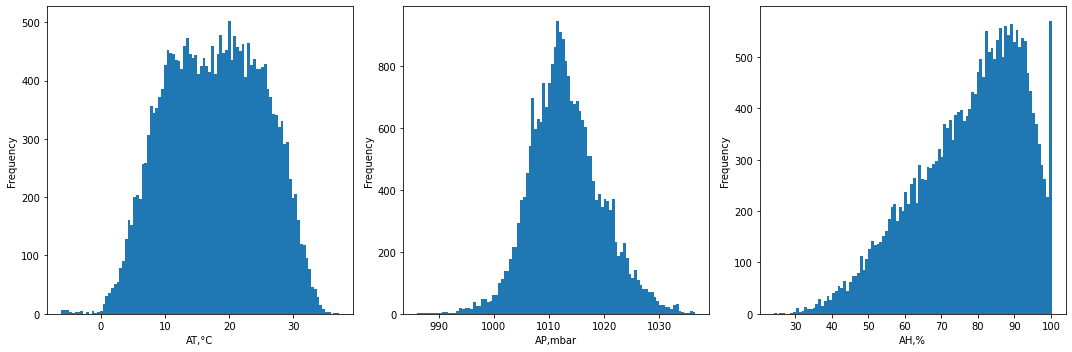

In [30]:
#plot the distribution of the Natural predictors
_, axs = plt.subplots(1,3, figsize = (15,5))
for (col,m), ax in zip(ambiental_pred.items(), axs):
    ax.hist(dev_df[col].values, bins = 100, alpha = 1)
    ax.set_xlabel(f'{col},{m}')
    ax.set_ylabel('Frequency')

plt.tight_layout()

In [37]:
skew_dict = dict(dev_df.loc[:,ambiental_pred.keys()].skew())
skew_df = pd.DataFrame(data = skew_dict.values(), index = skew_dict.keys(), columns = ['skw']).T
pd.concat([dev_df.loc[:,ambiental_pred.keys()].describe(), skew_df], axis = 0)

AT            AP            AH
count  24488.000000  24488.000000  24488.000000
mean      17.732311   1013.040249     77.851576
std        7.472854      6.472126     14.528496
min       -6.234800    986.160000     24.085000
25%       11.754750   1008.800000     68.164000
50%       17.838000   1012.600000     80.494000
75%       23.715500   1016.900000     89.392250
max       37.103000   1036.500000    100.200000
skw       -0.045858      0.208211     -0.631636

The distribution of AT and AP have a bell shape, while the AH has the highest skewness.

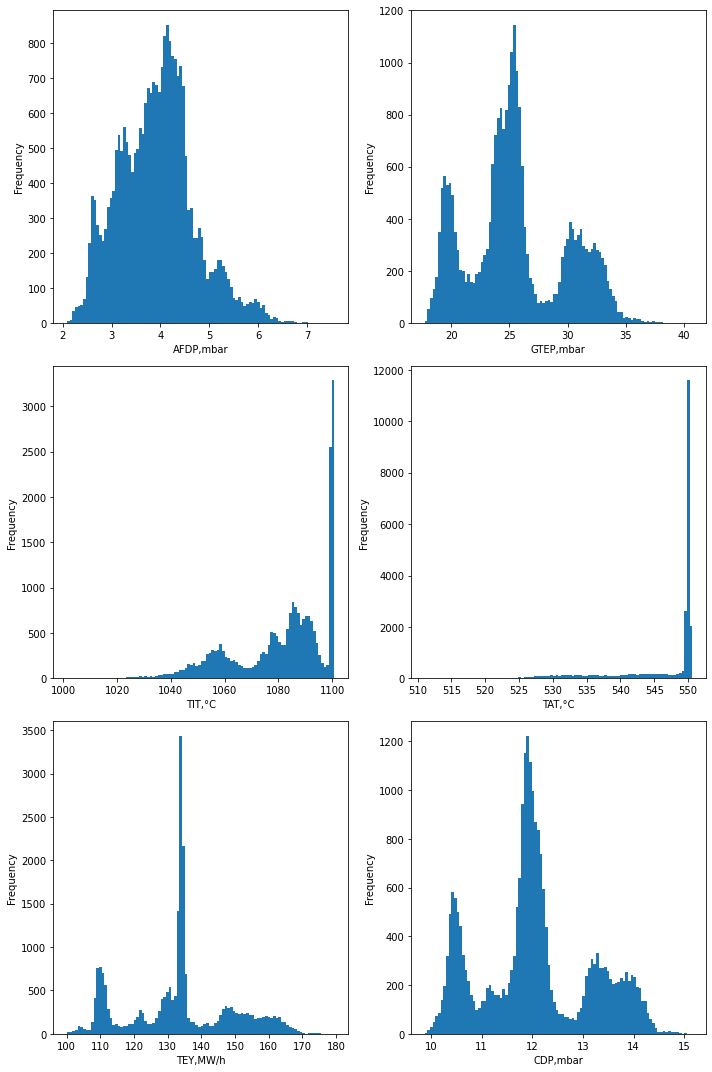

In [32]:
#plot the distribution of the Processor predictors
_, axs = plt.subplots(3,2, figsize = (10,15))
for (col,m), ax in zip(processing_pred.items(), axs.ravel()):
    ax.hist(dev_df[col].values, bins = 100, alpha = 1)
    ax.set_xlabel(f'{col},{m}')
    ax.set_ylabel('Frequency')

plt.tight_layout()

In [38]:
skew_dict = dict(dev_df.loc[:,processing_pred.keys()].skew())
skew_df = pd.DataFrame(data = skew_dict.values(), index = skew_dict.keys(), columns = ['skw']).T
pd.concat([dev_df.loc[:,processing_pred.keys()].describe(), skew_df], axis = 0)

AFDP          GTEP           TIT           TAT           TEY  \
count  24488.000000  24488.000000  24488.000000  24488.000000  24488.000000   
mean       3.926046     25.547051   1081.393270    546.180856    133.444970   
std        0.775096      4.188980     17.511092      6.829290     15.606517   
min        2.087400     17.698000   1001.300000    511.040000    100.020000   
25%        3.354175     23.080000   1071.600000    544.810000    124.220000   
50%        3.937450     25.092500   1085.900000    549.880000    133.730000   
75%        4.377350     28.958500   1096.700000    550.040000    143.790000   
max        7.554900     40.716000   1100.900000    550.610000    179.500000   
skw        0.379258      0.334873     -0.876195     -1.763993      0.124520   

                CDP  
count  24488.000000  
mean      12.056017  
std        1.087296  
min        9.875400  
25%       11.423000  
50%       11.963000  
75%       12.824000  
max       15.159000  
skw        0.242225

CDP, GTEP and TEY present a multimodal distribution.
TAT, TIT have a skewed distribution.
AFDP is a more normal distribution, but it still has an high skewness.

### 2.1.1 CO univariate analysis

In [34]:
dev_df['CO'].describe()

count    24488.000000
mean         2.379069
std          2.270383
min          0.000388
25%          1.186750
50%          1.719450
75%          2.866625
max         44.103000
Name: CO, dtype: float64

The CO emission has a great difference between the median or the 75% quantile and the max value. Let analyze the boxplot and the distribution.

Text(0.5, 1.0, 'CO boxplot')

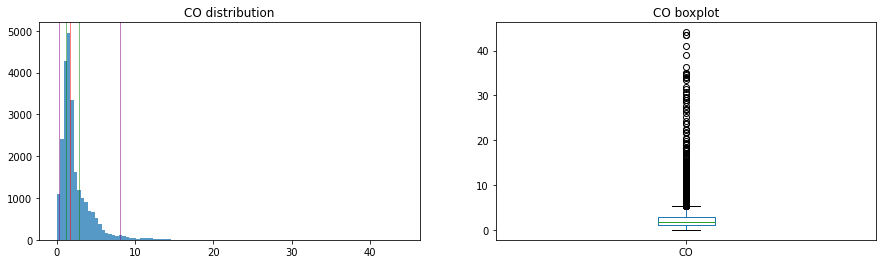

In [5]:
fig, [dist, box] = plt.subplots(1,2, figsize = (15,4))

_ = dist.hist(dev_df['CO'].values, bins = 100, alpha = 0.75)      
dist.axvline(dev_df['CO'].median(), c  = 'red', alpha = 1, linewidth = 0.5)

#Green lines: 1st and 3rd quantiles
dist.axvline(dev_df.CO.quantile(0.25), c = 'green',alpha = 1, linewidth = 0.5)
dist.axvline(dev_df.CO.quantile(0.75), c = 'green', alpha = 1, linewidth = 0.5)

#Purple lines: 0.025 and 0.975 quantiles
dist.axvline(dev_df.CO.quantile(0.025), c = 'purple', alpha = 1, linewidth = 0.5)
dist.axvline(dev_df.CO.quantile(0.975), c = 'purple', alpha = 1, linewidth = 0.5)
dist.set_title('CO distribution')

#Boxplot
dev_df.boxplot(column = 'CO', showfliers = True, grid = False, ax = box)
box.set_title('CO boxplot')

lower_bound : 0, upper_bound : 5.3864374999999995
outliers : 1681, 0.07%


Text(0.5, 1.0, 'CO distribution')

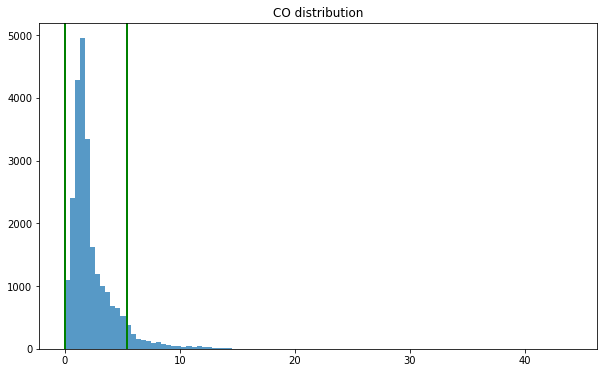

In [39]:
q1, q3 = dev_df['CO'].quantile([0.25,0.75])
iqr = q3 - q1
lower_bound = max(0,q1 -(1.5 * iqr))
upper_bound = q3 +(1.5 * iqr) 

print(f'lower_bound : {lower_bound}, upper_bound : {upper_bound}')
outliers = dev_df['CO'].loc[ (dev_df['CO'] < lower_bound) | (dev_df['CO'] > upper_bound)].count()
print(f'outliers : {outliers}, {outliers/len(dev_df):.2f}%')

_ = plt.hist(dev_df['CO'].values, bins = 100, alpha = 0.75)     

#Green lines : lower and upper bounds
plt.axvline(lower_bound, c = 'green',alpha = 1, linewidth = 2)
plt.axvline(upper_bound, c = 'green', alpha = 1, linewidth = 2)

plt.title('CO distribution')

There are 1681 observations considered as otuliers.  

## 2.2 Multivariate Analysis

### 2.2.1 YEAR vs CO

Text(0.5, 0.98, '')

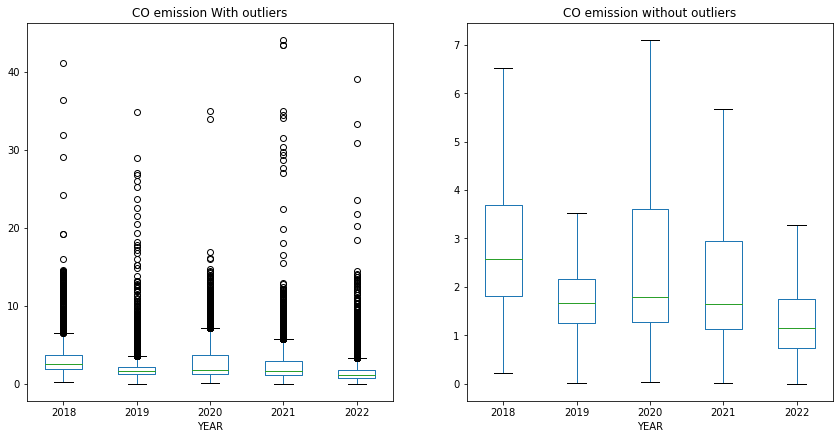

In [37]:
fig, [out, no_out] = plt.subplots(1,2, figsize= (14,7))

plt.tight_layout()

dev_df.boxplot(column = 'CO', by = 'YEAR', showfliers = True, grid = False, ax = out)
out.set_title('CO emission With outliers')


dev_df.boxplot(column = 'CO', by = 'YEAR', showfliers = False, grid = False, ax = no_out)
no_out.set_title('CO emission without outliers')

plt.suptitle('')

We can observe a decreasing trend across the YEAR in CO emission. YEAR may be a valuable predictor for the regression analysis.

In [38]:
dev_df[['CO', 'YEAR']].groupby('YEAR').describe()

CO                                                             \
       count      mean       std       min       25%      50%       75%   
YEAR                                                                      
2018  4877.0  3.130690  2.252167  0.212800  1.813000  2.57350  3.699100   
2019  4760.0  2.089425  1.930739  0.006915  1.257250  1.66510  2.168100   
2020  4759.0  2.751337  2.405253  0.029480  1.272950  1.78850  3.609850   
2021  5142.0  2.365469  2.512320  0.007505  1.121675  1.63890  2.948025   
2022  4950.0  1.573285  1.839435  0.000388  0.726328  1.14855  1.752750   

              
         max  
YEAR          
2018  41.097  
2019  34.820  
2020  35.045  
2021  44.103  
2022  39.050

### 2.2.2 LOC vs CO

<AxesSubplot:title={'center':'CO'}, xlabel='LOC'>

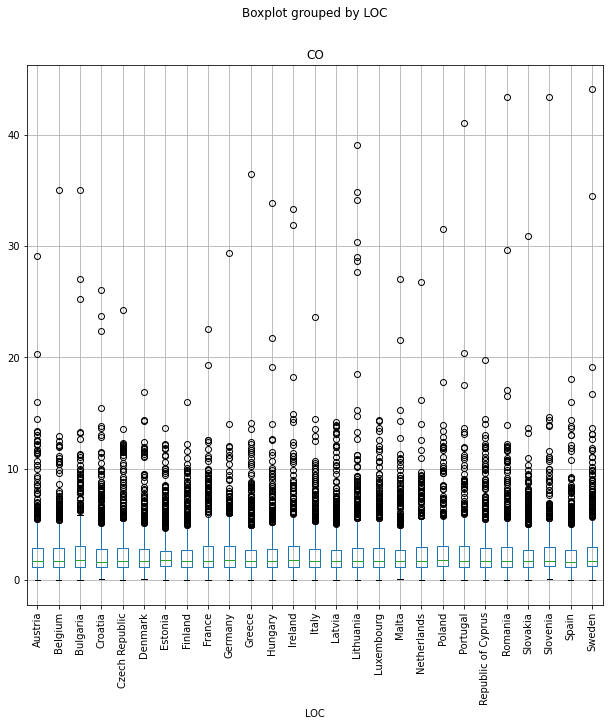

In [39]:
dev_df.boxplot(column = 'CO', by = 'LOC', rot= 90, figsize = (10,10))

In [40]:
by_countries_CO_stats = dev_df[['CO','LOC']].groupby('LOC').describe()
by_countries_CO_stats

CO                                                   \
                    count      mean       std       min       25%      50%   
LOC                                                                          
Austria             869.0  2.396225  2.373099  0.010960  1.160000  1.71780   
Belgium             909.0  2.327204  2.166127  0.000388  1.155400  1.72070   
Bulgaria            888.0  2.489912  2.492534  0.042265  1.204775  1.76105   
Croatia             920.0  2.353900  2.338390  0.045731  1.183725  1.65695   
Czech Republic      937.0  2.381492  2.168382  0.020591  1.164500  1.69050   
Denmark             954.0  2.280000  1.949931  0.062556  1.179975  1.68500   
Estonia             845.0  2.284559  1.881075  0.006915  1.215700  1.75490   
Finland             867.0  2.289974  1.891694  0.027221  1.176800  1.70420   
France              872.0  2.429210  2.200943  0.003665  1.186850  1.71480   
Germany             960.0  2.353815  2.023082  0.035076  1.176100  1.76450   
Greece              947.0  2.312705  2.196780  0.016447  1.178400  1.72880   
Hungary             878.0  2.375815  2.296535  0.044665  1.201600  1.72025   
Ireland             876.0  2.477619  2.506142  0.007505  1.189250  1.78215   
Italy               910.0  2.332138  2.051564  0.013877  1.199950  1.71395   
Latvia              905.0  2.308665  2.072646  0.026562  1.166600  1.67690   
Lithuania           938.0  2.558181  3.265424  0.041929  1.172725  1.72900   
Luxembourg          853.0  2.394341  2.049718  0.019098  1.201600  1.71240   
Malta               955.0  2.316858  2.105545  0.051019  1.170650  1.72670   
Netherlands         855.0  2.369634  2.088505  0.018433  1.179900  1.74260   
Poland              837.0  2.442858  2.308612  0.037001  1.214100  1.77680   
Portugal            965.0  2.401878  2.393654  0.017149  1.165000  1.72160   
Republic of Cyprus  890.0  2.428440  2.180466  0.026376  1.196375  1.71470   
Romania             925.0  2.508321  2.675786  0.001594  1.208900  1.72520   
Slovakia            935.0  2.280816  1.994698  0.022105  1.195400  1.72630   
Slovenia            938.0  2.345568  2.279563  0.069452  1.224000  1.74560   
Spain               924.0  2.293435  2.025137  0.020066  1.172525  1.65930   
Sweden              936.0  2.510044  2.740395  0.008931  1.217075  1.71565   

                                      
                         75%     max  
LOC                                   
Austria             2.868200  29.084  
Belgium             2.845800  35.045  
Bulgaria            3.092050  35.019  
Croatia             2.757000  26.026  
Czech Republic      2.904700  24.239  
Denmark             2.757625  16.883  
Estonia             2.612000  13.657  
Finland             2.659100  16.022  
France              3.075900  22.511  
Germany             3.062175  29.341  
Greece              2.680350  36.454  
Hungary             2.802050  33.913  
Ireland             3.071675  33.346  
Italy               2.808125  23.629  
Latvia              2.713300  14.163  
Lithuania           2.895100  39.050  
Luxembourg          2.916400  14.354  
Malta               2.673350  26.999  
Netherlands         2.946300  26.752  
Poland              3.029800  31.538  
Portugal            3.082400  41.097  
Republic of Cyprus  2.887925  19.798  
Romania             2.928200  43.428  
Slovakia            2.724100  30.866  
Slovenia            2.963275  43.397  
Spain               2.711325  18.049  
Sweden              2.985300  44.103

There are no differences across the countires with respect to the CO emission value. Probably it will not be useful for the regression. In order to confirm our idea we will implement a model with all the predictors, including LOC with a one-hot encoding, a then a feature backward elimination. 

### 2.2.3 Correlation Matrix 

<AxesSubplot:>

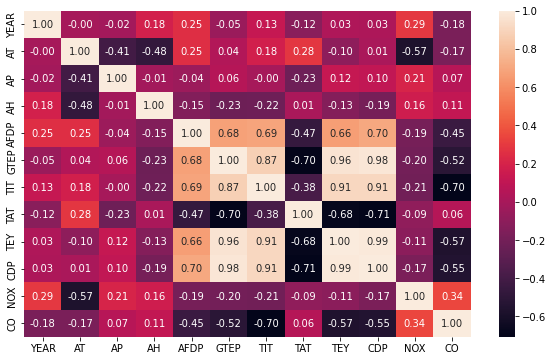

In [41]:
sns.heatmap(dev_df.corr('pearson'), annot = True, fmt = '.2f')

In [42]:
dev_df.corr('pearson')['CO'].sort_values()

TIT    -0.702058
TEY    -0.565702
CDP    -0.547465
GTEP   -0.516484
AFDP   -0.445265
YEAR   -0.177655
AT     -0.173731
TAT     0.056917
AP      0.066065
AH      0.112168
NOX     0.343427
CO      1.000000
Name: CO, dtype: float64

The 5 predictors with the highest correlation with respect to CO emission are TIT, TEY, CDP, GTEP and AFDP.
However, we can observe a very high correlation in the following pairs:
* $\rho$(TEY, CDP) = 0.99
* $\rho$(CDP, GTEP) = 0.98
* $\rho$(TEY, GTEP) = 0.96
* $\rho$(TEY, TIT) = 0.91
* $\rho$(TIT, GTEP) = 0.87

It will be important to check what are the more significance variables for regression. Observing the correlation with CO it may be important to keep **TIT** and maybe **GTEP**. In this way we discard the pairs with the highest correlation and preserve the most correlated predictor with respect to CO.

In the follwing cell we plot the correlation graphs in order to have also a visual evidence.

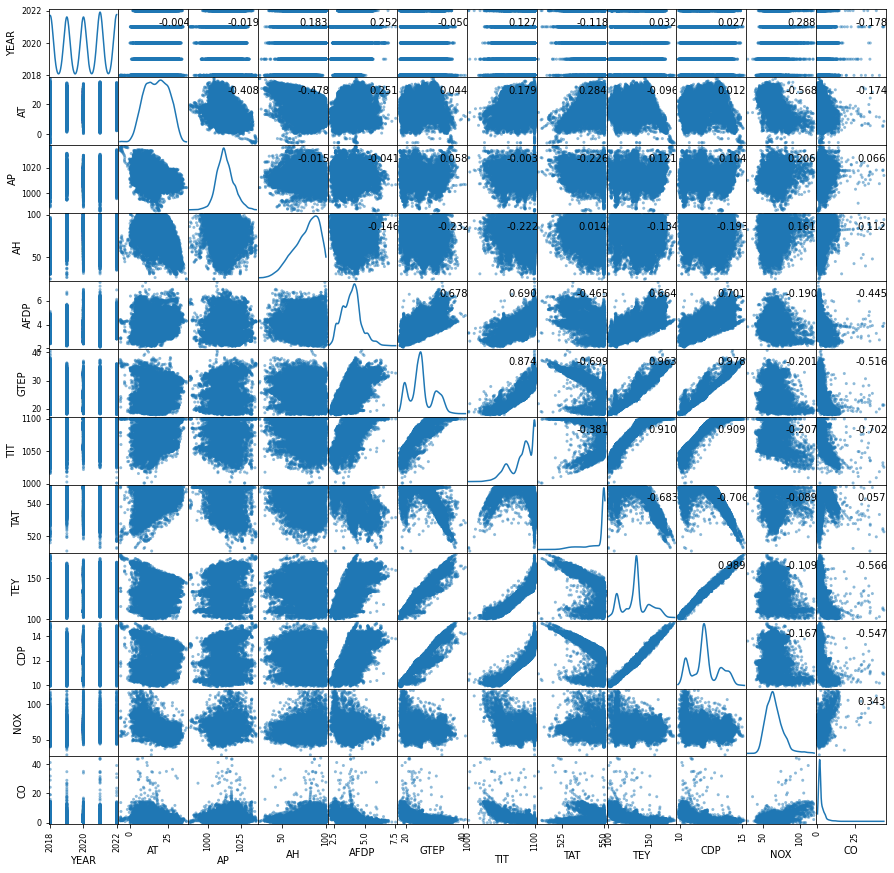

In [43]:
axes = pd.plotting.scatter_matrix(dev_df, alpha=0.5, diagonal='kde', figsize = (15,15))
corr = dev_df.corr().to_numpy()
for i, j in zip(*plt.np.triu_indices_from(axes, k=1)):
    axes[i, j].annotate("%.3f" %corr[i,j], (0.8, 0.8), xycoords='axes fraction', ha='center', va='center')
plt.show()

The processing features seem to have a quadratic correlation with CO, so it may be a good idea to implement a polynomial regression.

# 3.Pre-processing

This section contains all the transformations required to prepare the data

Since we have to apply the same transformantion on both **dev_df** and **eval_df**, we concatenate them. The dev_df has index that goes from 1 up to 24487, while eval_df index starts from 24488 and ends with 36732.

In [44]:
dev_eval_df = pd.concat((dev_df, eval_df),axis = 0)
dev_eval_df

YEAR             LOC       SN       AT      AP      AH    AFDP    GTEP  \
ID                                                                              
0      2022         Austria  0903XTR  24.9180  1006.8  55.697  3.3648  22.322   
1      2022         Romania  0903XTR  14.3320  1024.1  81.857  3.2767  20.049   
2      2022          Sweden  0903XTR  11.5480  1009.1  78.389  4.9142  28.616   
3      2022         Finland  0903XTR  25.5970  1003.0  77.744  3.2325  20.749   
4      2022         Estonia  0903XTR  13.4840  1011.1  96.477  4.1968  24.230   
...     ...             ...      ...      ...     ...     ...     ...     ...   
36728  2019         Germany  0903XTR  13.0950  1019.7  83.641  2.7132  23.150   
36729  2019        Slovenia  0903XTR   7.0438  1002.1  67.981  3.7544  32.331   
36730  2018          France  0903XTR  14.4540  1014.7  77.738  2.7177  18.748   
36731  2019  Czech Republic  0903XTR  22.6350  1019.2  84.384  4.1836  22.719   
36732  2022         Croatia  0903XTR  25.4410  1010.4  62.973  4.0609  25.744   

          TIT     TAT     TEY     CDP      NOX        CO  
ID                                                        
0      1071.5  550.03  119.83  11.171      NaN   1.07640  
1      1037.3  533.70  110.05  10.692  102.010  10.19600  
2      1093.9  539.43  147.19  12.979      NaN   0.78407  
3      1062.1  549.95  112.79  10.624   52.225   1.61530  
4      1086.1  550.08  133.71  11.921   71.915   1.40710  
...       ...     ...     ...     ...      ...       ...  
36728  1068.0  550.05  124.78  11.295      NaN       NaN  
36729  1100.1  532.65  163.17  14.029   60.576       NaN  
36730  1045.8  549.75  107.85  10.208      NaN       NaN  
36731  1066.8  549.90  120.02  11.230      NaN       NaN  
36732  1093.1  550.29  133.75  12.200      NaN       NaN  

[36733 rows x 14 columns]

## 3.1 Removing SN

Since SN column has the same value, 0903XTR, for all the entries, we remove it.

In [45]:
dev_eval_df = dev_eval_df.drop(columns = 'SN')
dev_eval_df.head()

YEAR      LOC      AT      AP      AH    AFDP    GTEP     TIT     TAT  \
ID                                                                          
0   2022  Austria  24.918  1006.8  55.697  3.3648  22.322  1071.5  550.03   
1   2022  Romania  14.332  1024.1  81.857  3.2767  20.049  1037.3  533.70   
2   2022   Sweden  11.548  1009.1  78.389  4.9142  28.616  1093.9  539.43   
3   2022  Finland  25.597  1003.0  77.744  3.2325  20.749  1062.1  549.95   
4   2022  Estonia  13.484  1011.1  96.477  4.1968  24.230  1086.1  550.08   

       TEY     CDP      NOX        CO  
ID                                     
0   119.83  11.171      NaN   1.07640  
1   110.05  10.692  102.010  10.19600  
2   147.19  12.979      NaN   0.78407  
3   112.79  10.624   52.225   1.61530  
4   133.71  11.921   71.915   1.40710

## 3.2 One-hot encoding of LOC

In the 'Feature Analysis' section, it was noted that location does not appear to be discriminative in the calculation of CO. However, to confirm this intuition, models will be developed in subsequent sections by including the LOC column. For this reason, 1-hot encoding is appplicated below.

In [46]:
LOC_onehot = pd.get_dummies(dev_eval_df['LOC'])

In [47]:
onehot_df = pd.concat((dev_eval_df,LOC_onehot), axis = 1).drop(columns = 'LOC')
onehot_df

YEAR       AT      AP      AH    AFDP    GTEP     TIT     TAT     TEY  \
ID                                                                             
0      2022  24.9180  1006.8  55.697  3.3648  22.322  1071.5  550.03  119.83   
1      2022  14.3320  1024.1  81.857  3.2767  20.049  1037.3  533.70  110.05   
2      2022  11.5480  1009.1  78.389  4.9142  28.616  1093.9  539.43  147.19   
3      2022  25.5970  1003.0  77.744  3.2325  20.749  1062.1  549.95  112.79   
4      2022  13.4840  1011.1  96.477  4.1968  24.230  1086.1  550.08  133.71   
...     ...      ...     ...     ...     ...     ...     ...     ...     ...   
36728  2019  13.0950  1019.7  83.641  2.7132  23.150  1068.0  550.05  124.78   
36729  2019   7.0438  1002.1  67.981  3.7544  32.331  1100.1  532.65  163.17   
36730  2018  14.4540  1014.7  77.738  2.7177  18.748  1045.8  549.75  107.85   
36731  2019  22.6350  1019.2  84.384  4.1836  22.719  1066.8  549.90  120.02   
36732  2022  25.4410  1010.4  62.973  4.0609  25.744  1093.1  550.29  133.75   

          CDP  ...  Malta  Netherlands  Poland  Portugal  Republic of Cyprus  \
ID             ...                                                             
0      11.171  ...      0            0       0         0                   0   
1      10.692  ...      0            0       0         0                   0   
2      12.979  ...      0            0       0         0                   0   
3      10.624  ...      0            0       0         0                   0   
4      11.921  ...      0            0       0         0                   0   
...       ...  ...    ...          ...     ...       ...                 ...   
36728  11.295  ...      0            0       0         0                   0   
36729  14.029  ...      0            0       0         0                   0   
36730  10.208  ...      0            0       0         0                   0   
36731  11.230  ...      0            0       0         0                   0   
36732  12.200  ...      0            0       0         0                   0   

       Romania  Slovakia  Slovenia  Spain  Sweden  
ID                                                 
0            0         0         0      0       0  
1            1         0         0      0       0  
2            0         0         0      0       1  
3            0         0         0      0       0  
4            0         0         0      0       0  
...        ...       ...       ...    ...     ...  
36728        0         0         0      0       0  
36729        0         0         1      0       0  
36730        0         0         0      0       0  
36731        0         0         0      0       0  
36732        0         0         0      0       0  

[36733 rows x 39 columns]

The new dataset has 14 (starting columns) + 27 (#countries) - 2 (LOC, SN) = 39 columns

<AxesSubplot:>

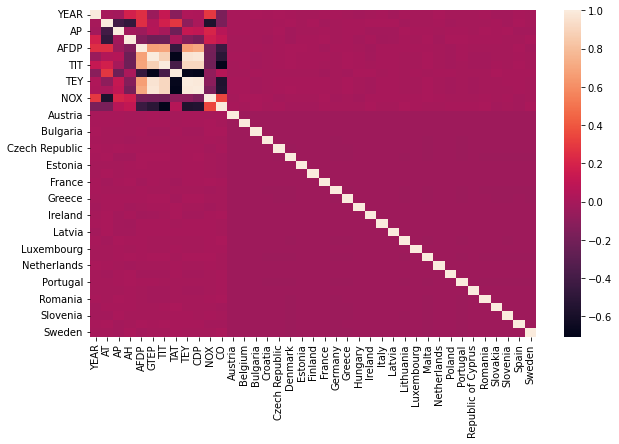

In [48]:
sns.heatmap(onehot_df[:24487].corr())

In [49]:
countries = dev_df['LOC'].values
onehot_df.corr().loc[onehot_df.corr().columns.isin(countries), 'CO']

Austria               0.001449
Belgium              -0.004485
Bulgaria              0.009470
Croatia              -0.002190
Czech Republic        0.000213
Denmark              -0.008786
Estonia              -0.007870
Finland              -0.007518
France                0.004244
Germany              -0.002247
Greece               -0.005863
Hungary              -0.000276
Ireland               0.008361
Italy                -0.004061
Latvia               -0.006075
Lithuania             0.015745
Luxembourg            0.001278
Malta                -0.005520
Netherlands          -0.000790
Poland                0.005286
Portugal              0.002035
Republic of Cyprus    0.004223
Romania               0.011280
Slovakia             -0.008623
Slovenia             -0.002945
Spain                -0.007469
Sweden                0.011501
Name: CO, dtype: float64

As was expected there is no correlation between LOC and CO emission. We can probably discard the LOC column.

## 3.3 Filling NOX

The strategy adopted for filling NOX missing values is using a KNN algorithm by exploiting the environmental predictors and turbine predictors. In this way, each record will be assigned an emission value similar to records with the same values on the other columns.

In [50]:
l_amb_pred = list(ambiental_pred.keys())
l_proc_pred = list(processing_pred.keys())

In [51]:
dev_eval_df_for_knnImputer = dev_eval_df[['YEAR']+l_amb_pred+l_proc_pred+['NOX']]

imputer = KNNImputer(n_neighbors=5)
filled_vales = imputer.fit_transform(dev_eval_df_for_knnImputer.values)

In [52]:
dev_eval_df_for_knnImputer.loc[:,['YEAR']+l_amb_pred+l_proc_pred+['NOX']] = filled_vales
dev_eval_df_for_knnImputer.shape

/tmp/ipykernel_3207/2270512881.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dev_eval_df_for_knnImputer.loc[:,['YEAR']+l_amb_pred+l_proc_pred+['NOX']] = filled_vales


(36733, 11)

In [53]:
onehot_df.loc[:, 'NOX'] = dev_eval_df_for_knnImputer['NOX']

In [54]:
onehot_df.head()

YEAR      AT      AP      AH    AFDP    GTEP     TIT     TAT     TEY  \
ID                                                                         
0   2022  24.918  1006.8  55.697  3.3648  22.322  1071.5  550.03  119.83   
1   2022  14.332  1024.1  81.857  3.2767  20.049  1037.3  533.70  110.05   
2   2022  11.548  1009.1  78.389  4.9142  28.616  1093.9  539.43  147.19   
3   2022  25.597  1003.0  77.744  3.2325  20.749  1062.1  549.95  112.79   
4   2022  13.484  1011.1  96.477  4.1968  24.230  1086.1  550.08  133.71   

       CDP  ...  Malta  Netherlands  Poland  Portugal  Republic of Cyprus  \
ID          ...                                                             
0   11.171  ...      0            0       0         0                   0   
1   10.692  ...      0            0       0         0                   0   
2   12.979  ...      0            0       0         0                   0   
3   10.624  ...      0            0       0         0                   0   
4   11.921  ...      0            0       0         0                   0   

    Romania  Slovakia  Slovenia  Spain  Sweden  
ID                                              
0         0         0         0      0       0  
1         1         0         0      0       0  
2         0         0         0      0       1  
3         0         0         0      0       0  
4         0         0         0      0       0  

[5 rows x 39 columns]

In [55]:
onehot_df['NOX'].info()

<class 'pandas.core.series.Series'>
Int64Index: 36733 entries, 0 to 36732
Series name: NOX
Non-Null Count  Dtype  
--------------  -----  
36733 non-null  float64
dtypes: float64(1)
memory usage: 574.0 KB


Now all columns does not have missing values.

In [56]:
onehot_df[['NOX','CO']].corr()

NOX        CO
NOX  1.000000  0.342271
CO   0.342271  1.000000

As we expected the correlation between NOX and CO is still the same. We can assume that the imputer worked well, it is not necessary a deeper tuning of it.

## 3.4 Dataset standardization

Apply standardization to the ambiental and process predictors.

In [57]:
scaler = StandardScaler()
scaler.fit(onehot_df.loc[:24487,'AT':'NOX'])
std_df = onehot_df.copy()
std_df.loc[:,'AT':'NOX'] = scaler.transform(onehot_df.loc[:,'AT':'NOX'])

Standardizing also the year feature to mapping [2018,2019,2020,2021,2022] to [1,2,3,4,5] 

In [58]:
std_df['YEAR'] = std_df.loc[:,'YEAR'].apply(lambda x: x-2022+5)


In [59]:
std_df.head()

YEAR        AT        AP        AH      AFDP      GTEP       TIT  \
ID                                                                     
0      5  0.961592 -0.964193 -1.524936 -0.724114 -0.769905 -0.564983   
1      5 -0.455031  1.708863  0.275700 -0.837779 -1.312530 -2.518071   
2      5 -0.827587 -0.608815  0.036992  1.274906  0.732639  0.714232   
3      5  1.052456 -1.551338 -0.007405 -0.894806 -1.145422 -1.101797   
4      5 -0.568511 -0.299791  1.282019  0.349324 -0.314415  0.268791   

         TAT       TEY       CDP  ...  Malta  Netherlands  Poland  Portugal  \
ID                                ...                                         
0   0.563634 -0.872408 -0.813978  ...      0            0       0         0   
1  -1.827585 -1.499082 -1.254529  ...      0            0       0         0   
2  -0.988535  0.880742  0.848897  ...      0            0       0         0   
3   0.551920 -1.323511 -1.317071  ...      0            0       0         0   
4   0.570956  0.016982 -0.124179  ...      0            0       0         0   

    Republic of Cyprus  Romania  Slovakia  Slovenia  Spain  Sweden  
ID                                                                  
0                    0        0         0         0      0       0  
1                    0        1         0         0      0       0  
2                    0        0         0         0      0       1  
3                    0        0         0         0      0       0  
4                    0        0         0         0      0       0  

[5 rows x 39 columns]

In [60]:
#Saving the pre-processed dataset
std_df.to_csv('processed_dataset/std_dataset.csv')

# 4. Model Selection

In [5]:
std_df = pd.read_csv('processed_dataset/std_dataset.csv', index_col = 0)

dev_df = std_df.loc[:24487,:]
eval_df = std_df.loc[24488:,:]
dev_df.shape, eval_df.shape

((24488, 39), (12245, 39))

In this section we will try the default version of several scikitlearn regressors and compare them with a PrettyTable object. Once we choose the best one we will proceed with the feature selection step and the fine tuning of the model.

In [6]:
#Importing the models
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

#Metric
from sklearn.metrics import mean_squared_error as mse

#Pretty Table
from prettytable import PrettyTable

In [4]:
#Defining the models 
degree = 3

regression_models = [
    LinearRegression(),
    Ridge(random_state = rs),
    Lasso(random_state = rs), 
    MLPRegressor(random_state = rs, max_iter = 10000),
    SVR(),
    RandomForestRegressor(random_state = rs),
    make_pipeline(
        PolynomialFeatures(degree),
        LinearRegression()
    ),
    make_pipeline(
        PolynomialFeatures(degree),
        Ridge(alpha=1)
    ),
    make_pipeline(
        PolynomialFeatures(degree),
        Lasso(alpha=1)
    )
]

names = [
    'linreg',
    'ridge',
    'lasso',
    'mlp_standard',
    'svr',
    'rf',
    f'poly{degree}+linreg',
    f'poly{degree}+ridge',
    f'poly{degree}+lasso',
]

In [5]:
t = PrettyTable()

dev_df = std_df.loc[:24487,:]


t.field_names = ['model', 'MSE']

for model, name in zip(regression_models, names):
    print(model)
    X = dev_df.drop(columns = 'CO')
    y = dev_df['CO']
    
    X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = rs, test_size = 0.25)
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    t.add_row([name, mse(y_test, y_pred)])

LinearRegression()
Ridge(random_state=42)
Lasso(random_state=42)
MLPRegressor(max_iter=10000, random_state=42)
SVR()
RandomForestRegressor(random_state=42)
Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=3)),
                ('linearregression', LinearRegression())])
Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=3)),
                ('ridge', Ridge(alpha=1))])
Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=3)),
                ('lasso', Lasso(alpha=1))])


In [6]:
print(t)

+--------------+--------------------+
|    model     |        MSE         |
+--------------+--------------------+
|    linreg    | 1.7052824761576666 |
|    ridge     | 1.7051675560259711 |
|    lasso     | 3.5978836067143054 |
| mlp_standard | 1.7845806413827072 |
|     svr      | 1.3610710359431097 |
|      rf      | 1.3770917881893519 |
| poly3+linreg | 1.854367731874119  |
| poly3+ridge  | 1.7087831029710794 |
| poly3+lasso  | 1.9311730138873915 |
+--------------+--------------------+


The best regressors are SVR and RandomForestRegressor. They will be tuned in the next steps.

Now let check what are the most important features extracted by the Random Forest.

In [75]:
rf = regression_models[5]
sorted(zip(rf.feature_names_in_, rf.feature_importances_), key = lambda x:x[1], reverse = True)

[('TIT', 0.4838686404507648),
 ('TAT', 0.22824818273823605),
 ('NOX', 0.03853851683591036),
 ('AFDP', 0.033094911202094186),
 ('YEAR', 0.03148257722055552),
 ('AT', 0.030497762978044775),
 ('CDP', 0.029709864422391288),
 ('TEY', 0.02757971729732101),
 ('AP', 0.027296750470771226),
 ('GTEP', 0.02283828627987233),
 ('AH', 0.020792707854186715),
 ('Hungary', 0.0034880346629518858),
 ('Lithuania', 0.0025875959181193274),
 ('Ireland', 0.002213756689020565),
 ('Slovakia', 0.00163683418566019),
 ('Czech Republic', 0.001546733978167309),
 ('France', 0.0011361463306328496),
 ('Spain', 0.0011297286978639602),
 ('Germany', 0.0011079770878351758),
 ('Croatia', 0.001070592478539789),
 ('Malta', 0.0008089017362448176),
 ('Sweden', 0.0007301331027760326),
 ('Finland', 0.0007203489228549277),
 ('Romania', 0.0007091562129279605),
 ('Slovenia', 0.0007068163017798052),
 ('Austria', 0.0006513047386583537),
 ('Netherlands', 0.0006242496870203584),
 ('Bulgaria', 0.0006138702424766172),
 ('Republic of Cyprus

As expected the location is not very influent as predictor and TIT is considered the most important. 
Surprisingly TAT is the second most important feature even if it has only 0.05 as pearson correlation coefficient.
Taking into consideration the correlated feature we could remove CDP and TEY without losing significative features for the RF.

# 5. Feature Selection

In [7]:
countries = list(dev_df.columns[-27:])

In [90]:
models = [SVR(),
          RandomForestRegressor(random_state = rs)]
names = ['svr','rf']

remove_features = [['CDP'], ['TEY'], ['GTEP'], ['CDP','TEY'], ['CDP','GTEP'], ['GTEP','TEY']]

for features in remove_features:
    print(f'Removed : {features}')
    t_feature_selection = PrettyTable()
    t_feature_selection.field_names = ['model', 'MSE']
    for model, name in zip(models, names):
        print(model)
        X = dev_df.drop(columns = list(['CO'] + countries + features))
        y = dev_df['CO']

        X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = rs, test_size = 0.25)

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        t_feature_selection.add_row([name, mse(y_test, y_pred)])
    print(t_feature_selection)

Removed : ['CDP']
SVR()
RandomForestRegressor(random_state=42)
+-------+--------------------+
| model |        MSE         |
+-------+--------------------+
|  svr  | 1.3555432174945452 |
|   rf  | 1.3518106725941688 |
+-------+--------------------+
Removed : ['TEY']
SVR()
RandomForestRegressor(random_state=42)
+-------+--------------------+
| model |        MSE         |
+-------+--------------------+
|  svr  | 1.3561016471053404 |
|   rf  | 1.3925129076498102 |
+-------+--------------------+
Removed : ['GTEP']
SVR()
RandomForestRegressor(random_state=42)
+-------+--------------------+
| model |        MSE         |
+-------+--------------------+
|  svr  | 1.3601214320291017 |
|   rf  | 1.3830389478776985 |
+-------+--------------------+
Removed : ['CDP', 'TEY']
SVR()
RandomForestRegressor(random_state=42)
+-------+--------------------+
| model |        MSE         |
+-------+--------------------+
|  svr  | 1.3578105675015837 |
|   rf  | 1.3492571512887988 |
+-------+------------------

The best performance for SVR is removing CDP, while the best mse obtained for RandomForestRegressor is the one removing CDP and TEY. Since the mse for SVR without CDP and TEY (1.3578) is similar to the mse without CDP (1.3555), we can remove both columns.

In [8]:
final_X = dev_df.drop(columns = list(['CO'] + countries + ['TEY', 'CDP']))
final_X.head()

YEAR        AT        AP        AH      AFDP      GTEP       TIT  \
ID                                                                     
0      5  0.961592 -0.964193 -1.524936 -0.724114 -0.769905 -0.564983   
1      5 -0.455031  1.708863  0.275700 -0.837779 -1.312530 -2.518071   
2      5 -0.827587 -0.608815  0.036992  1.274906  0.732639  0.714232   
3      5  1.052456 -1.551338 -0.007405 -0.894806 -1.145422 -1.101797   
4      5 -0.568511 -0.299791  1.282019  0.349324 -0.314415  0.268791   

         TAT       NOX  
ID                      
0   0.563634 -0.754509  
1  -1.827585  3.339348  
2  -0.988535  0.825031  
3   0.551920 -1.172058  
4   0.570956  0.612206

<AxesSubplot:>

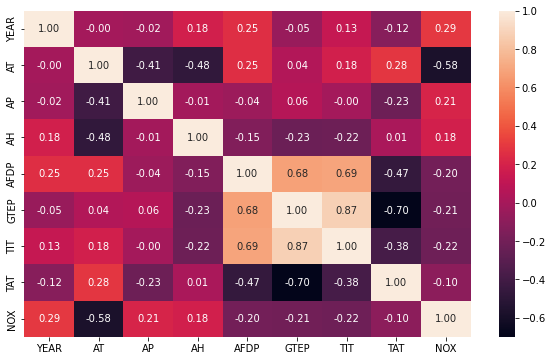

In [9]:
sns.heatmap(final_X.corr(), annot = True, fmt = '.2f')

Now the highest correlation value is 0.87 for the pair TIT, GTEP

Since some features seem to have a quadratic relationship with CO we training the SVR and the RandomForest also with polynomial features with degree 2,3,4.

In [16]:
models = [make_pipeline(
            PolynomialFeatures(degree = 2),
            SVR()
            ),
          make_pipeline(
            PolynomialFeatures(degree = 3),
            SVR()
            ),
          make_pipeline(
            PolynomialFeatures(degree = 4),
            SVR()
            ),
          make_pipeline(
            PolynomialFeatures(degree = 2),
            RandomForestRegressor(random_state = rs)
            ),
          make_pipeline(
            PolynomialFeatures(degree = 3),
            RandomForestRegressor(random_state = rs)
            ),
          make_pipeline(
            PolynomialFeatures(degree = 4),
            RandomForestRegressor(random_state = rs)
            )
          ]

names = [
    f'poly{2}+svr',
    f'poly{3}+svr',
    f'poly{4}+svr',
    f'poly{2}+rf',
    f'poly{3}+rf',
    f'poly{4}+rf',
]

t_poly = PrettyTable()
t_poly.field_names = ['model', 'MSE']

for model, name in zip(models, names):
        print(model)
        X = final_X.copy()
        y = dev_df['CO']

        X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = rs, test_size = 0.25)

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        t_poly.add_row([name, mse(y_test, y_pred)])
        
print(t_poly)


Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()), ('svr', SVR())])
Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=3)),
                ('svr', SVR())])
Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=4)),
                ('svr', SVR())])
Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('randomforestregressor',
                 RandomForestRegressor(random_state=42))])
Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=3)),
                ('randomforestregressor',
                 RandomForestRegressor(random_state=42))])
Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=4)),
                ('randomforestregressor',
                 RandomForestRegressor(random_state=42))])
+-----------+--------------------+
|   model   |        MSE         |
+-----------+--------------------+
| poly2+svr | 1.4226081278965939 |
| poly3+svr | 1.4729722589184504 |
| poly4+svr | 1.5760248528789447 |


The results obtained suggets that increasing the degree the total mse decreases for the RandomForest while the SVR gets worse. 
In the next section we try to fine tune the pipeline PolynomialFeatures+RandomForest with degree 2 and 3, since there is not a huge improvement between degree 3 and 4.

# 6. Fine Tuning

In [11]:
from sklearn.pipeline import Pipeline
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV, HalvingRandomSearchCV

In order to keep this notebook clean we perform a first random search separately. The best predictor obtained is reported on the next cell. The mse obtained on the training set is 1.169 while the public score is 1.114.

In [46]:
pipeline = Pipeline([
            ('poly',PolynomialFeatures(degree = 2)),
            ('rf', RandomForestRegressor(max_features='log2', n_estimators=300, random_state = 42))
           ])
pipeline

Pipeline(steps=[('poly', PolynomialFeatures()),
                ('rf',
                 RandomForestRegressor(max_features='log2', n_estimators=300,
                                       random_state=42))])

In [47]:
X_train, X_test, y_train, y_test = train_test_split(final_X, dev_df['CO'], test_size = 0.25, random_state=rs)
pipeline.fit(X_train, y_train)
pred = pipeline.predict(X_test)
mse(y_test, pred)

1.16998619547601

As was expected the pipeline with PolynomialFatures(degree = 3) has a comparable performance with the pipeline version with PolynomialFeatures(degree = 2) on the training set, but it is affected by overfitting. Indeed the best pipeline with PolynomialFeatures(degree = 3) has a public score of 1.245. 

In [14]:
pipeline = Pipeline([
            ('poly',PolynomialFeatures(degree = 3)),
            ('rf', RandomForestRegressor(bootstrap=False, max_depth=110, max_features='sqrt',
                      min_samples_leaf=2, n_estimators=300, random_state = rs))
           ])
pipeline

Pipeline(steps=[('poly', PolynomialFeatures(degree=3)),
                ('rf',
                 RandomForestRegressor(bootstrap=False, max_depth=110,
                                       max_features='sqrt', min_samples_leaf=2,
                                       n_estimators=300, random_state=42))])

In [15]:
pipeline.fit(X_train, y_train)
pred = pipeline.predict(X_test)
mse(y_test, pred)

1.1856693884878078

## 6.1 Halving Search

Starting from the result above we perform a halving grid search around the best values. The halving grid search allows to speed up the serach since starts training whole the combinations of parameters on a subset of the data and at each iteration selects the best candidates and test them on a larger part of data until the best set of hyperparameters are left standing. For further information about HalvingGridSearch we refer you to the documentation (https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.HalvingGridSearchCV.html?highlight=gridsearch#sklearn.model_selection.HalvingGridSearchCV).

For the Halving Search we use the following parameters: 

In [76]:
#Regressor
n_estimators = [200,300,400]

max_features = ['sqrt','log2', None, 0.3]

max_depth = [50,100,200, None]

bootstrap = [True, False]



grid = {
    'rf__n_estimators':n_estimators,
    'rf__max_features': max_features,
    'rf__max_depth': max_depth,
    'rf__bootstrap': bootstrap
}



print(grid)

{'rf__n_estimators': [200, 300, 400], 'rf__max_features': ['sqrt', 'log2', None, 0.3], 'rf__max_depth': [50, 100, 200, None], 'rf__bootstrap': [True, False]}


In [93]:
from sklearn.metrics import make_scorer

pipeline = Pipeline([
            ('poly',PolynomialFeatures(degree = 2)),
            ('rf', RandomForestRegressor(random_state = 42))
           ])

def mse_scorer(y_true, y_pred):
    return mse(y_true, y_pred)

halving_search = HalvingGridSearchCV(estimator= pipeline, 
                           param_grid = grid,
                           scoring =  make_scorer(mse_scorer, greater_is_better=False),
                           factor = 3, cv = 3, verbose=1, 
                           random_state = rs,
                           n_jobs = -1)


In [94]:
halving_search.fit(final_X,dev_df['CO'])

n_iterations: 5
n_required_iterations: 5
n_possible_iterations: 5
min_resources_: 302
max_resources_: 24488
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 96
n_resources: 302
Fitting 3 folds for each of 96 candidates, totalling 288 fits
----------
iter: 1
n_candidates: 32
n_resources: 906
Fitting 3 folds for each of 32 candidates, totalling 96 fits
----------
iter: 2
n_candidates: 11
n_resources: 2718
Fitting 3 folds for each of 11 candidates, totalling 33 fits
----------
iter: 3
n_candidates: 4
n_resources: 8154
Fitting 3 folds for each of 4 candidates, totalling 12 fits
----------
iter: 4
n_candidates: 2
n_resources: 24462
Fitting 3 folds for each of 2 candidates, totalling 6 fits


HalvingGridSearchCV(cv=3,
                    estimator=Pipeline(steps=[('poly', PolynomialFeatures()),
                                              ('rf',
                                               RandomForestRegressor(max_features='log2',
                                                                     n_estimators=300,
                                                                     random_state=42))]),
                    n_jobs=-1,
                    param_grid={'rf__bootstrap': [True, False],
                                'rf__max_depth': [50, 100, 200, None],
                                'rf__max_features': ['sqrt', 'log2', None, 0.3],
                                'rf__n_estimators': [200, 300, 400]},
                    random_state=42,
                    scoring=make_scorer(mse_scorer, greater_is_better=False),
                    verbose=1)

In [95]:
halving_search.best_estimator_, halving_search.best_score_

(Pipeline(steps=[('poly', PolynomialFeatures()),
                 ('rf',
                  RandomForestRegressor(bootstrap=False, max_depth=200,
                                        max_features='log2', n_estimators=400,
                                        random_state=42))]),
 -1.218777534410098)

In [96]:
best = halving_search.best_estimator_
X_train, X_test, y_train, y_test = train_test_split(final_X, dev_df['CO'], test_size = 0.25, random_state=rs)
best.fit(X_train, y_train)
pred = best.predict(X_test)
mse(y_test, pred)

1.169756908262528

The halving serch returns a set of hyperparameters with comparable performance with respect to the previous best.

# 7. Result Analysis 

In [9]:
pipeline = Pipeline([
            ('poly',PolynomialFeatures(degree = 2)),
            ('rf', RandomForestRegressor(bootstrap=False, max_depth=200,
                                        max_features='log2', n_estimators=400,
                                        random_state=42))
           ])

X_train, X_test, y_train, y_test = train_test_split(final_X, dev_df['CO'], test_size = 0.25, random_state=rs)
pipeline.fit(X_train, y_train)
pred = pipeline.predict(X_test)
mse(y_test, pred)

1.169756908262528

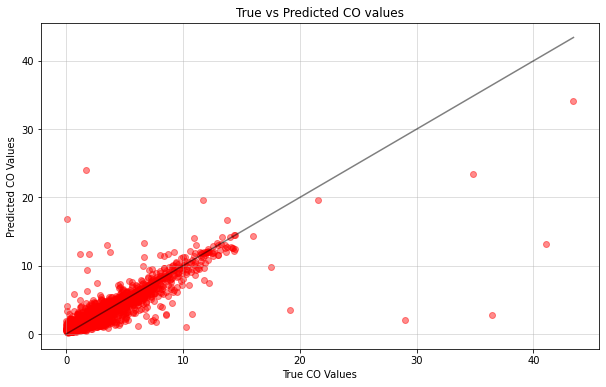

In [26]:
plt.scatter(y_test, pred, color = 'red', alpha = 0.45)
plt.plot(np.linspace(0, y_test.max()), np.linspace(0, y_test.max()), color = 'black', alpha = 0.5)
plt.ylabel('Predicted CO Values')
plt.xlabel('True CO Values')
plt.title('True vs Predicted CO values')
plt.grid(alpha = 0.5)
plt.savefig('figures/true_vs_pred.svg')

# 8 Future Works

In this section we tried to implement a new model where we insert a classifier on the top of the regression. In particular, the model first classifies if a record is standard (possible CO emission around the median value) or is extreme (possible CO emission at least two times then the median value) then the record is passed to the specific regressor model. 

In [132]:
from sklearn.base import BaseEstimator

class Model(BaseEstimator):
    
    def __init__(self, model_classifier, standard_regressor, extreme_regressor, weighted_pred = True):
        
        self.classifier = model_classifier
        self.std_regr = standard_regressor
        self.ext_regr = extreme_regressor
        self.weighted_pred = weighted_pred

        
        
    def fit(self, X, y):
        
        co_values = y.copy()
        binary_labels = y.apply(lambda x : 0 if x <4.5 else 1)
        
        print('Fitting the classifier.....')
        self.classifier.fit(X,binary_labels)
        print('Classifier fitted')
         
        
        mask = binary_labels.values == 0
        
        
        std_X, std_co_values = X[mask,:], co_values[mask]
        ext_X, ext_co_values = X[~mask,:], co_values[~mask]

        
        print(std_X.shape, ext_X.shape)
        
        print('Fitting the standard regressor...')
        self.std_regr.fit(std_X, std_co_values)
        print('Standard Regressor fitted')
        print('Fitting the extreme regressor...')
        self.ext_regr.fit(ext_X, ext_co_values)
        print('Extrem Regressor fitted')
        
        return self
    
    def predict(self,X):
        if self.weighted_pred:
            return self.predict_with_weights(X)
        else:
            return self.predict_with_0_1(X)
        
        
    def predict_with_0_1(self, X):
        """
        Predict the CO values as:
        predicted_label * std_pred + predicted_label * ext_pred
        """
        
        pred_labels = self.classifier.predict(X)
        
        mask = pred_labels == 0

        std_X = X[mask,:]
        ext_X = X[~mask,:]
        
        std_pred = self.std_regr.predict(std_X)
        ext_pred = self.ext_regr.predict(ext_X)
        
        y_pred = np.zeros(shape = pred_labels.shape)
        y_pred[mask] = std_pred
        y_pred[~mask] = ext_pred
        
        return y_pred, pred_labels
    
    def predict_with_weights(self, X):
        """
        Predict CO values as:
        P(standard | X) * std_regression + P(extrme | X) * ext_regression
        """
        posterior_probs = self.classifier.predict_proba(X)
        
        std_regressions = self.std_regr.predict(X)
        ext_regressions = self.ext_regr.predict(X)
        
        regressions = np.concatenate((std_regressions.reshape(-1,1), ext_regressions.reshape(-1,1)), axis = 1)
        
        y = (posterior_probs*regressions).sum(axis = 1)
        
        return y

The best configuration that we tried for the model above is reported in the next cell. The public score obtained is 1.116 predicting with the posterior probabilities and 1.118 predict with 0/1 weights. 

* The classifier is tuned on the all dataset.
* The standard_regressor is tuned on the dev_df records where the CO value is standard.
* The standard_regressor is tuned on the dev_df records where the CO value is extreme.

In [142]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators= 400, min_samples_split=2, min_samples_leaf=1, 
                             max_features= 'log2', max_depth = 110,
                             random_state=42)

std_regr = RandomForestRegressor(n_estimators=300, min_samples_split=4, 
                                 min_samples_leaf=2, max_features='sqrt',
                                 max_depth=20, bootstrap = False, 
                                 random_state = 42)

ext_regr = RandomForestRegressor(random_state = 42, 
                                 n_estimators = 300, 
                                 min_samples_split=4, min_samples_leaf = 1, 
                                 max_features='sqrt',
                                 max_depth=60,
                                 bootstrap=False)

model = Model(model_classifier = clf, standard_regressor = std_regr, extreme_regressor=ext_regr, weighted_pred=True)

model_pipeline = Pipeline([
            ('poly',PolynomialFeatures(degree = 2)),
            ('model', model)
           ])

In [143]:
dev_df['labels'] = dev_df['CO'].apply(lambda x : 0 if x < 4.5 else 1)
co_values = dev_df['CO']
labels = dev_df['labels']

X_train, X_test, y_train, y_test = train_test_split(final_X, dev_df['CO'],
                                                    random_state=42, test_size=0.25,
                                                    stratify=dev_df['labels'])


model_pipeline.fit(X_train, y_train)
pred = model_pipeline.predict(X_test)


/tmp/ipykernel_3127/3451864400.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dev_df['labels'] = dev_df['CO'].apply(lambda x : 0 if x < 4.5 else 1)


Fitting the classifier.....
Classifier fitted
(16239, 55) (2127, 55)
Fitting the standard regressor...
Standard Regressor fitted
Fitting the extreme regressor...
Extrem Regressor fitted


In [144]:
mse(y_test, pred)

1.1722560606056946